**References**:


*   Computing Platforms: Set up the Workspace for Machine Learning Projects.  https://ms.pubpub.org/pub/computing
*  Machine Learning for Predictions. https://ms.pubpub.org/pub/ml-prediction
* Machine Learning Packages: https://scikit-learn.org/stable/



# Import and Inspect Data

## import packages

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
plt.style.use('classic')
random.seed(42)

## import train and test data for Classification

In [3]:
C_train = pd.read_csv("/Users/james/Desktop/Final Project/Classification_Train.csv")
C_test = pd.read_csv("/Users/james/Desktop/Final Project/Classification_Test.csv")

In [4]:
C_train.isna().sum()

Unnamed: 0        0
Positive          0
ROI_past_ma10    10
dtype: int64

## Drop nan for classification Data

In [5]:
C_train =C_train.dropna()

In [6]:
C_train.head()

,Unnamed: 0,Positive,ROI_past_ma10
10,10,1,0.007593
11,11,1,0.011970
12,12,0,0.014561
13,13,1,0.008975
14,14,0,0.011273


In [7]:
C_test.isna().sum()

Unnamed: 0       0
Positive         0
ROI_past_ma10    0
dtype: int64

## import train and test data for Regression

In [8]:
R_train = pd.read_csv("/Users/james/Desktop/Final Project/Regression_Train.csv")
R_test = pd.read_csv("/Users/james/Desktop/Final Project/Regression_Test.csv")

## drop nan for Regression Data

In [9]:
R_train.isna().sum()

Unnamed: 0        0
ROI               0
ROI_past_ma10    10
dtype: int64

In [10]:
R_train=R_train.dropna()

In [11]:
R_test.isna().sum()

Unnamed: 0       0
ROI              0
ROI_past_ma10    0
dtype: int64

In [12]:
R_train.head()

,Unnamed: 0,ROI,ROI_past_ma10
10,10,0.055733,0.007593
11,11,0.043061,0.011970
12,12,-0.058060,0.014561
13,13,0.041147,0.008975
14,14,-0.021340,0.011273


In [13]:
R_test.head()

,Unnamed: 0,ROI,ROI_past_ma10
0,628,-0.022373,-0.001640
1,629,-0.014606,-0.002275
2,630,0.026532,-0.002427
3,631,0.034157,-0.002175
4,632,0.005665,-0.002000


# Machine Learning Classifier

references:


*   classification report: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

*   confusion matrix: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html


*   ROC AUC: 
 * https://developers.google.com/machine-learning/crash-course/classification/check-your-understanding-roc-and-auc
 * https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
  * https://youtu.be/4jRBRDbJemM





## Define the Train and Test (X,y)


In [14]:
C_train.head()

,Unnamed: 0,Positive,ROI_past_ma10
10,10,1,0.007593
11,11,1,0.011970
12,12,0,0.014561
13,13,1,0.008975
14,14,0,0.011273


In [15]:
X_train = pd.DataFrame(np.array(C_train['ROI_past_ma10']).astype(float).reshape(-1,1))
y_train = pd.DataFrame(C_train['Positive'].astype(int))

In [16]:
C_test.head()

,Unnamed: 0,Positive,ROI_past_ma10
0,628,0,-0.001640
1,629,0,-0.002275
2,630,1,-0.002427
3,631,1,-0.002175
4,632,1,-0.002000


In [17]:
X_test = pd.DataFrame(np.array(C_test['ROI_past_ma10']).astype(float).reshape(-1,1))
y_test = pd.DataFrame(C_test['Positive'].astype(int))

In [18]:
X_test

,0
0,-0.001640
1,-0.002275
2,-0.002427
3,-0.002175
4,-0.002000
...,...
309,0.002856
310,0.002816
311,0.002849
312,0.002951


## Import base packages

In [19]:
from sklearn.base import BaseEstimator
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

## Random Forest Classifier

reference:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
mdl = RandomForestClassifier().fit(X_train, y_train)

/var/folders/pr/0j1xfpyd3fs_ngsn3mvt0l080000gn/T/ipykernel_6081/1079220978.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdl = RandomForestClassifier().fit(X_train, y_train)


In [22]:
print(classification_report(y_test, mdl.predict(X_test)))

              precision    recall  f1-score   support

           0       0.52      0.52      0.52       161
           1       0.50      0.50      0.50       153

    accuracy                           0.51       314
   macro avg       0.51      0.51      0.51       314
weighted avg       0.51      0.51      0.51       314



/Users/james/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


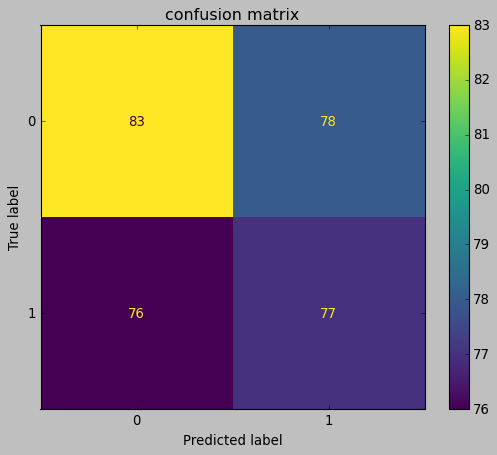

In [23]:
plot_confusion_matrix(mdl, X_test, y_test)
plt.title('confusion matrix')
plt.show()

/Users/james/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


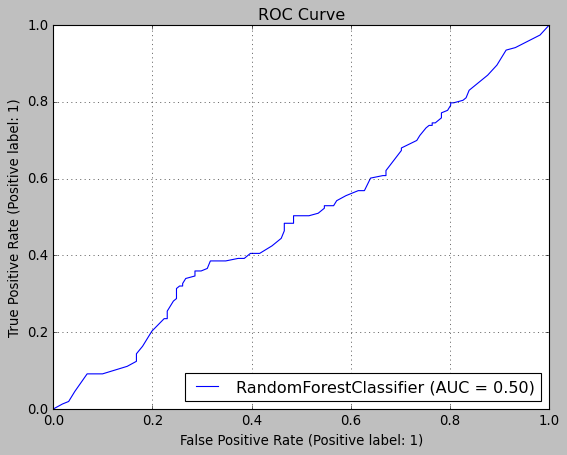

In [24]:
plot_roc_curve(mdl, X_test, y_test)
plt.grid()
plt.title('ROC Curve')
plt.show()

## Multi-Layer Classifier

reference:
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [25]:
from sklearn.neural_network import MLPClassifier

In [26]:
mdl = MLPClassifier(hidden_layer_sizes=256).fit(X_train, y_train)

/Users/james/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
print(classification_report(y_test, mdl.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       161
           1       0.49      1.00      0.66       153

    accuracy                           0.49       314
   macro avg       0.24      0.50      0.33       314
weighted avg       0.24      0.49      0.32       314



/Users/james/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/james/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/james/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/Users/james/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


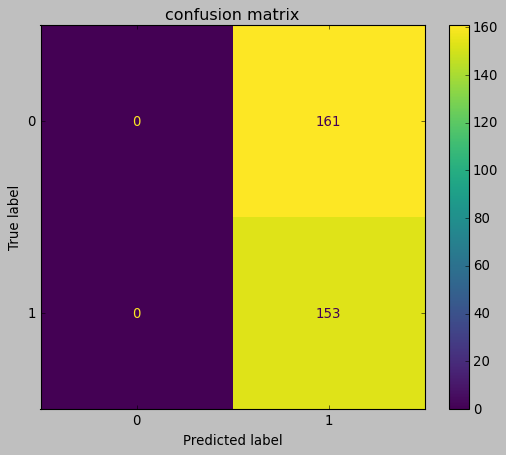

In [28]:
plot_confusion_matrix(mdl, X_test, y_test)
plt.title('confusion matrix')
plt.show()

# Machine Learning Regression

## important global packages

In [29]:
from sklearn.metrics import r2_score

## Define the Train and Test (X, y)

In [30]:
R_train.head()

,Unnamed: 0,ROI,ROI_past_ma10
10,10,0.055733,0.007593
11,11,0.043061,0.011970
12,12,-0.058060,0.014561
13,13,0.041147,0.008975
14,14,-0.021340,0.011273


In [31]:
X_train = pd.DataFrame(R_train['ROI_past_ma10'])
y_train = pd.DataFrame(R_train['ROI'])

In [32]:
R_test.head()

,Unnamed: 0,ROI,ROI_past_ma10
0,628,-0.022373,-0.001640
1,629,-0.014606,-0.002275
2,630,0.026532,-0.002427
3,631,0.034157,-0.002175
4,632,0.005665,-0.002000


In [33]:
X_test = pd.DataFrame(R_test['ROI_past_ma10'])
y_test = pd.DataFrame(R_test['ROI'])

## Linear Regression

In [34]:
from sklearn import linear_model

In [35]:
mdl = linear_model.LinearRegression().fit(X_train,y_train)

In [36]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')


R2 Score: -0.0005058755942635162


In [37]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,0.000266
1,0.000087
2,0.000045
3,0.000116
4,0.000165
...,...
309,0.001532
310,0.001521
311,0.001530
312,0.001559


/var/folders/pr/0j1xfpyd3fs_ngsn3mvt0l080000gn/T/ipykernel_6081/3084031857.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


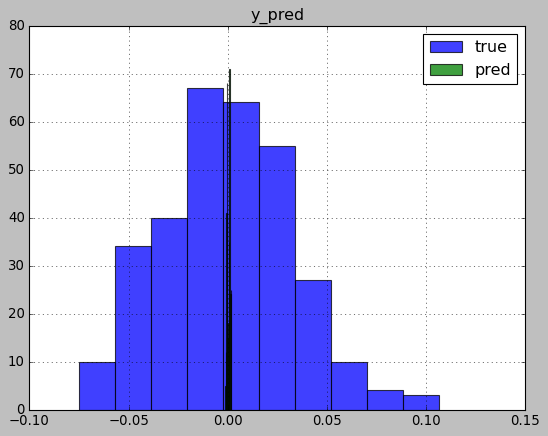

In [38]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()


In [39]:
y_plot = y_test.copy()
y_plot["y_pred"] = y_pred.values
y_plot.head()

,ROI,y_pred
0,-0.022373,0.000266
1,-0.014606,0.000087
2,0.026532,0.000045
3,0.034157,0.000116
4,0.005665,0.000165


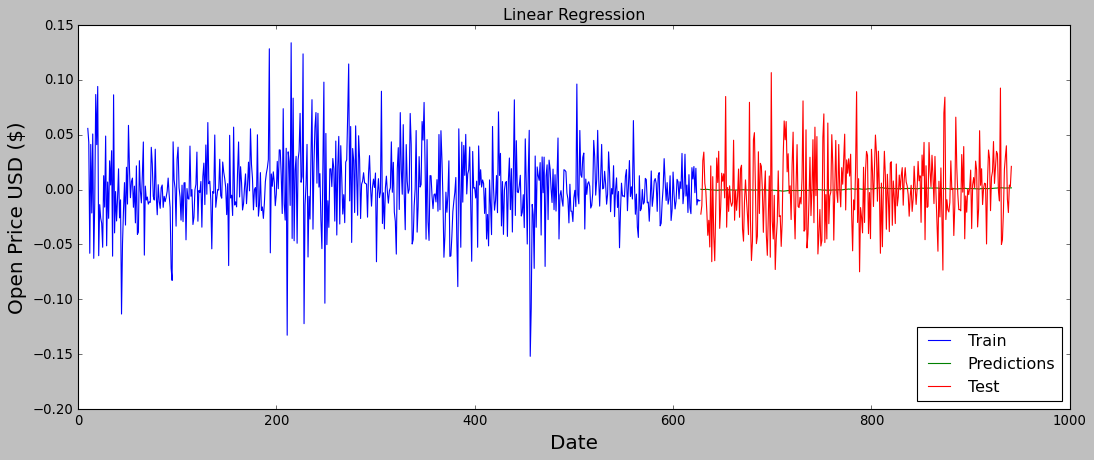

In [40]:
plt.figure(figsize=(16, 6))
plt.title('Linear Regression')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price USD ($)', fontsize=18)
plt.plot(R_train['Unnamed: 0'],R_train['ROI'])
plt.plot(R_test['Unnamed: 0'],y_plot['y_pred'])
plt.plot(R_test['Unnamed: 0'],R_test['ROI'])
plt.legend(['Train', 'Predictions', 'Test'], loc='lower right')
plt.show()

## Random Forest Regression

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
mdl = RandomForestRegressor().fit(X_train, y_train)

/var/folders/pr/0j1xfpyd3fs_ngsn3mvt0l080000gn/T/ipykernel_6081/3800963566.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdl = RandomForestRegressor().fit(X_train, y_train)


In [43]:
# calculate R2
from sklearn.metrics import r2_score

In [44]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')


R2 Score: -0.49844654779284925


In [45]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,-0.016654
1,-0.043081
2,0.003012
3,0.017699
4,-0.014216
...,...
309,-0.048336
310,-0.072342
311,-0.047751
312,-0.032876


/var/folders/pr/0j1xfpyd3fs_ngsn3mvt0l080000gn/T/ipykernel_6081/3084031857.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


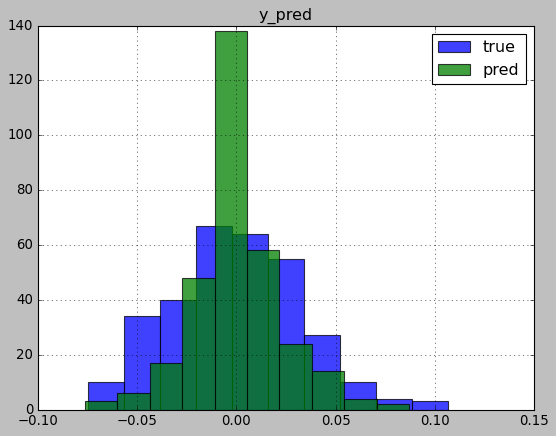

In [46]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()


In [47]:
y_plot = y_test.copy()
y_plot["y_pred"] = y_pred.values
y_plot.head()

,ROI,y_pred
0,-0.022373,-0.016654
1,-0.014606,-0.043081
2,0.026532,0.003012
3,0.034157,0.017699
4,0.005665,-0.014216


In [48]:
np.argmin(R_train['ROI'])

446

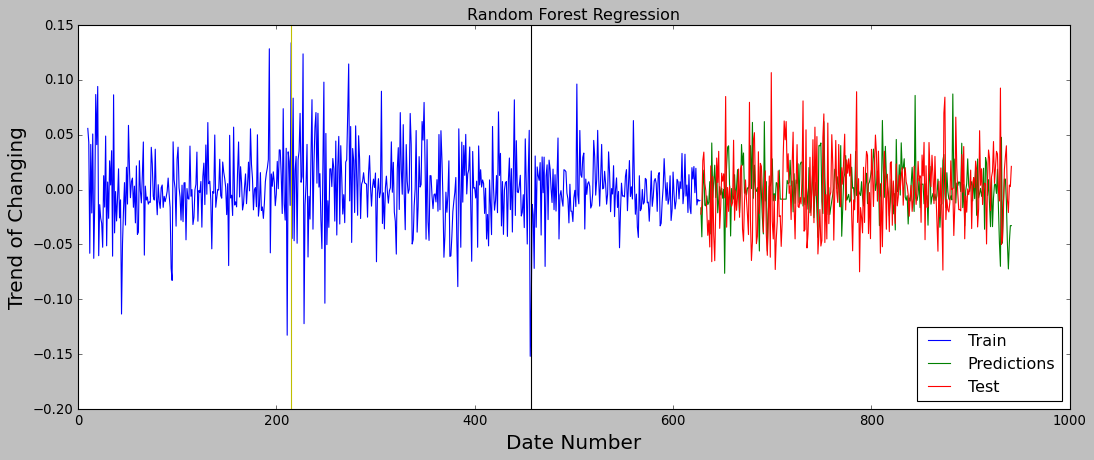

In [49]:
plt.figure(figsize=(16, 6))
plt.title('Random Forest Regression')
plt.xlabel('Date Number', fontsize=18)
plt.ylabel('Trend of Changing', fontsize=18)
plt.plot(R_train['Unnamed: 0'],R_train['ROI'])
plt.plot(R_test['Unnamed: 0'],y_plot['y_pred'])
plt.plot(R_test['Unnamed: 0'],R_test['ROI'])
plt.legend(['Train', 'Predictions', 'Test'], loc='lower right')
plt.axvline(x=215, ymin=0, ymax=1, c='y')
plt.axvline(x=457, ymin=0, ymax=1, c='black')
plt.show()

## Bayesian Ridge Regression


reference: https://scikit-learn.org/stable/modules/linear_model.html#orthogonal-matching-pursuit-omp

created by scikit_learn

In [50]:
from sklearn import linear_model

In [51]:
mdl = linear_model.BayesianRidge().fit(X_train, y_train)



/Users/james/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [52]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')

R2 Score: -0.0027997074991312765


In [53]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,0.001211
1,0.001206
2,0.001205
3,0.001207
4,0.001208
...,...
309,0.001247
310,0.001247
311,0.001247
312,0.001248


/var/folders/pr/0j1xfpyd3fs_ngsn3mvt0l080000gn/T/ipykernel_6081/3509561082.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


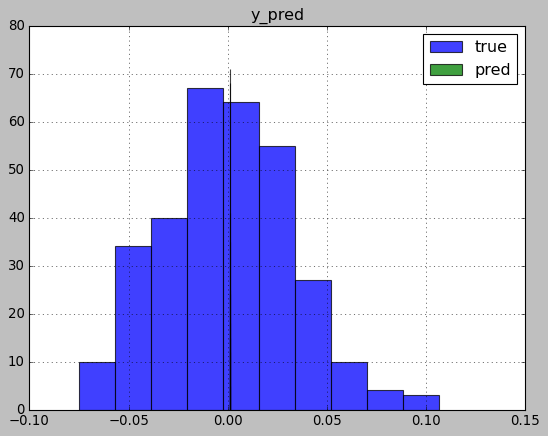

In [54]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()

## ElasticNet

reference: https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_and_elasticnet.html#sphx-glr-auto-examples-linear-model-plot-lasso-and-elasticnet-py

created by scikit_learn

In [55]:
from sklearn.linear_model import ElasticNet

In [56]:
enet = ElasticNet(alpha=0.75, l1_ratio=0.7)
mdl = ElasticNet(alpha=0.75, l1_ratio=0.7).fit(X_train, y_train)

In [57]:
mdl = ElasticNet().fit(X_train, y_train)

In [58]:
r2 = r2_score(y_test, mdl.predict(X_test))

print(f'R2 Score: {r2}')


R2 Score: -0.0029069270161699023


In [59]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,0.001239
1,0.001239
2,0.001239
3,0.001239
4,0.001239
...,...
309,0.001239
310,0.001239
311,0.001239
312,0.001239


/var/folders/pr/0j1xfpyd3fs_ngsn3mvt0l080000gn/T/ipykernel_6081/3509561082.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


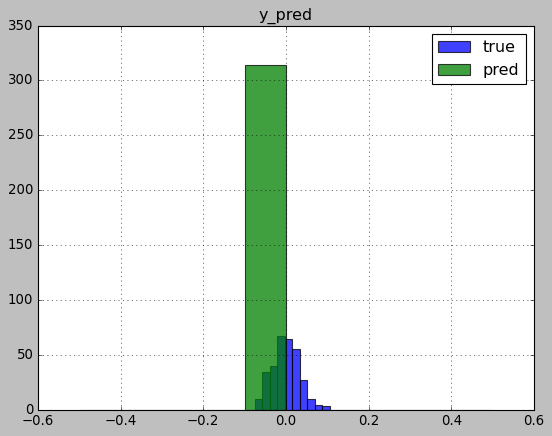

In [60]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()

/var/folders/pr/0j1xfpyd3fs_ngsn3mvt0l080000gn/T/ipykernel_6081/3509561082.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


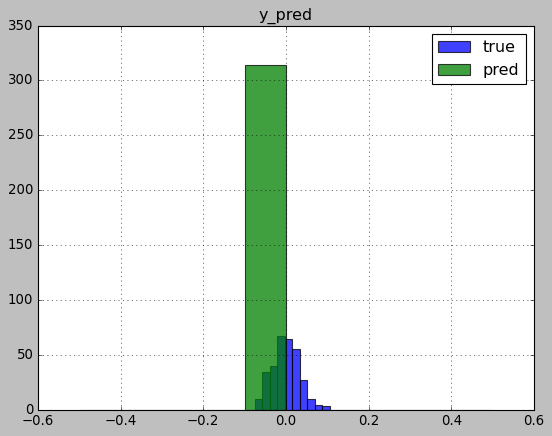

In [61]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()